In [1]:
## Analysis Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Data Import
#Opioid Settlement Expenditures Data https://kffhealthnews.org/download-the-data-opioid-settlement-expenditures/ (Obtained from: KFF Health News, the Johns Hopkins Bloomberg School of Public Health, and Shatterproof
opioidSettlementSummary = pd.read_excel("/Users/kjh60/Downloads/opioid-settlement-expenditures-downloadable-data-121224-2.xlsx",sheet_name = "Summary Data",header = 1)

populationPerState2020 =  pd.read_csv("/Users/kjh60/Downloads/DECENNIALCD1182020.P1-2024-12-17T184844.csv",header = None,skiprows = 1,names=['State','TotalPopulation'])
povertyPerState2021 = pd.read_csv("/Users/kjh60/Downloads/PovertyReportExactNumbers.csv",header = None, skiprows = 3, names=['State', 'TotalPoverty', 'LowerBound_TotalPoverty', 'UpperBound_TotalPoverty', 'ChildhoodPoverty', 'LowerBound_ChildhoodPoverty','UpperBound_ChildhoodPoverty'])
unemploymentRate = pd.read_csv("/Users/kjh60/Downloads/UnemploymentReportPercent.csv",header = None,skiprows = 1,names=['State','unemployment_2014','unemployment_2015','unemployment_2016','unemployment_2017','unemployment_2018','unemployment_2019','unemployment_2020','unemployment_2021','unemployment_2022','NotGiven','NotGiven2'])
drugOverdoseDeaths = pd.read_csv("/Users/kjh60/Downloads/DrugOverdoseDeaths.csv")
medianHouseholdIncome = pd.read_csv("/Users/kjh60/Downloads/MedianHouseholdIncome.csv",header = None,skiprows = 1,names=['State','MedianHouseholdIncome'])

In [3]:
## Data Cleaning
unemploymentRate = unemploymentRate.drop(['NotGiven','NotGiven2'],axis=1)

# clean up the strings to remove characters we can't use
for n in range(0,povertyPerState2021['TotalPoverty'].size):
    povertyPerState2021['TotalPoverty'][n] = povertyPerState2021['TotalPoverty'][n].replace(",","")
    povertyPerState2021['ChildhoodPoverty'][n] = povertyPerState2021['ChildhoodPoverty'][n].replace(",","")
    
for n in range(0,populationPerState2020['TotalPopulation'].size):
    populationPerState2020['TotalPopulation'][n] = populationPerState2020['TotalPopulation'][n].replace(",","")

drugOverdoseDeaths = drugOverdoseDeaths[drugOverdoseDeaths["Year"] == 2022]

for n in range(0,drugOverdoseDeaths['Deaths'].size):
    drugOverdoseDeaths['Deaths'][n] = drugOverdoseDeaths['Deaths'][n].replace(",","")

for n in range(0,medianHouseholdIncome['MedianHouseholdIncome'].size-1):
    medianHouseholdIncome['MedianHouseholdIncome'][n] = medianHouseholdIncome['MedianHouseholdIncome'][n].replace(",","")
    medianHouseholdIncome['MedianHouseholdIncome'][n] = medianHouseholdIncome['MedianHouseholdIncome'][n].replace("$","")

#convert the strings into proper data types
drugOverdoseDeaths['Deaths'] = drugOverdoseDeaths['Deaths'].astype(float)
drugOverdoseDeaths['Rate'] = drugOverdoseDeaths['Rate'].astype(float)
povertyPerState2021['TotalPoverty'] = povertyPerState2021['TotalPoverty'].astype(float)
populationPerState2020['TotalPopulation'] = populationPerState2020['TotalPopulation'].astype(float)
medianHouseholdIncome['MedianHouseholdIncome'] = medianHouseholdIncome['MedianHouseholdIncome'].astype(float)

/var/folders/pp/hwb4s2dn0dl65y07xq8qr3140000gn/T/ipykernel_94364/707590400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugOverdoseDeaths['Deaths'][n] = drugOverdoseDeaths['Deaths'][n].replace(",","")
/var/folders/pp/hwb4s2dn0dl65y07xq8qr3140000gn/T/ipykernel_94364/707590400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugOverdoseDeaths['Deaths'][n] = drugOverdoseDeaths['Deaths'][n].replace(",","")
/var/folders/pp/hwb4s2dn0dl65y07xq8qr3140000gn/T/ipykernel_94364/707590400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [4]:
## Combine data sets into a master table
opioidSettlementSummary_PopulationPerState2020 = pd.merge(opioidSettlementSummary, populationPerState2020,how="left", on=["State"]);
opioidSettlementSummary_PopulationPerState2020_povertyPerState2021 = pd.merge(opioidSettlementSummary_PopulationPerState2020, povertyPerState2021,how="left", on=["State"]);
opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome = pd.merge(opioidSettlementSummary_PopulationPerState2020_povertyPerState2021, medianHouseholdIncome,how="left", on=["State"]);
opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome_drugOverdoseDeaths2022 = pd.merge(opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome, drugOverdoseDeaths,how="left", on=["State"]);

totalInformation = pd.merge(opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome_drugOverdoseDeaths2022, unemploymentRate,how="left", on=["State"]);  

dataSizeTotalInformation = totalInformation.shape
OpioidSettlementReceivedPerPerson=[]
OpioidSettlementUntrackedPerPerson=[]

for n in range(0,dataSizeTotalInformation[0]):
    OpioidSettlementReceivedPerPerson.append(totalInformation['Opioid Settlement Funds Received (2022-2023)'][n]/totalInformation['TotalPopulation'][n])
    OpioidSettlementUntrackedPerPerson.append(totalInformation['Opioid Settlement Funds Untrackable via Public Reports (2022-2023)'][n]/totalInformation['TotalPopulation'][n])
    
totalInformation['OpioidSettlementReceivedPerPerson'] = OpioidSettlementReceivedPerPerson
totalInformation['OpioidSettlementUntrackedPerPerson'] = OpioidSettlementUntrackedPerPerson

working_df=totalInformation[['TotalPoverty','TotalPopulation','MedianHouseholdIncome','unemployment_2022','Deaths','Rate','Opioid Settlement Funds Received (2022-2023)','Opioid Settlement Funds Untrackable via Public Reports (2022-2023)','OpioidSettlementReceivedPerPerson','OpioidSettlementUntrackedPerPerson']]

In [5]:
# Find correlation of data
a = working_df.corr()


In [6]:
# Areas of higher positive Correlation
a[a>0.5]

print("The highest postive correlations exists between Total Population and Total Poverty (0.990) -- the bigger the population the larger the relative number of people in poverty, followed by Total Population and Number of Deaths due to Opioids (0.945) -- the bigger the population the more people in total the more people who could potentially die of drug abuse. We have to factor out the total population size of an area to get an effective comparison measure.")
print("The correlation of Total Poverty to Funds received in 2022-2023 (0.902) is slightly more correlated than the Total Population to Funds Received in 2022-2023 (0.892)")

The highest postive correlations exists between Total Population and Total Poverty (0.990) -- the bigger the population the larger the relative number of people in poverty, followed by Total Population and Number of Deaths due to Opioids (0.945) -- the bigger the population the more people in total the more people who could potentially die of drug abuse. We have to factor out the total population size of an area to get an effective comparison measure.
The correlation of Total Poverty to Funds received in 2022-2023 (0.902) is slightly more correlated than the Total Population to Funds Received in 2022-2023 (0.892)


In [7]:
# Areas of negative Correlation
a[a<0]
print("The highest negative correlation exists between the rate of deaths from drugs in 2022 and Median Household Income (-0.247), followed by the correlation between opioid settlement received per person and Median Household Income (-0.209) -- areas of poverty (reduced Median HouseHold Income) have a weak correlation with rate of death from drug overdose and settlement funds received per person ")

The highest negative correlation exists between the rate of deaths from drugs in 2022 and Median Household Income (-0.247), followed by the correlation between opioid settlement received per person and Median Household Income (-0.209) -- areas of poverty (reduced Median HouseHold Income) have a weak correlation with rate of death from drug overdose and settlement funds received per person 


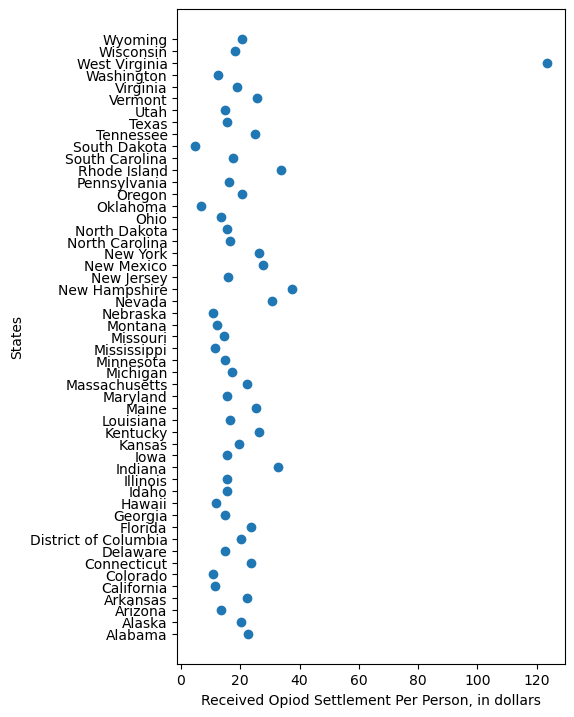

In [8]:
plt.figure(figsize=(5, 8.5)) 
plt.scatter(totalInformation['OpioidSettlementReceivedPerPerson'],totalInformation['State'])
plt.xlabel("Received Opiod Settlement Per Person, in dollars")
plt.ylabel("States")
plt.show()

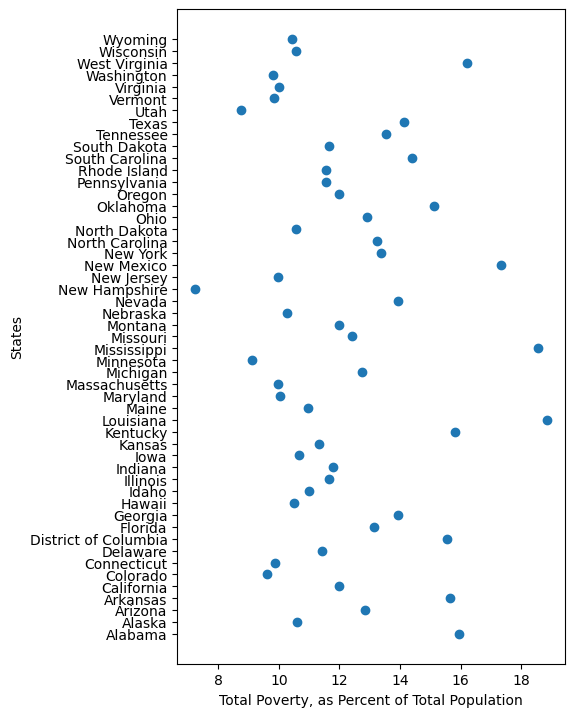

In [9]:
plt.figure(figsize=(5, 8.5))
plt.scatter(100*totalInformation['TotalPoverty']/totalInformation['TotalPopulation'],totalInformation['State'])
plt.xlabel("Total Poverty, as Percent of Total Population")
plt.ylabel("States")
plt.show()

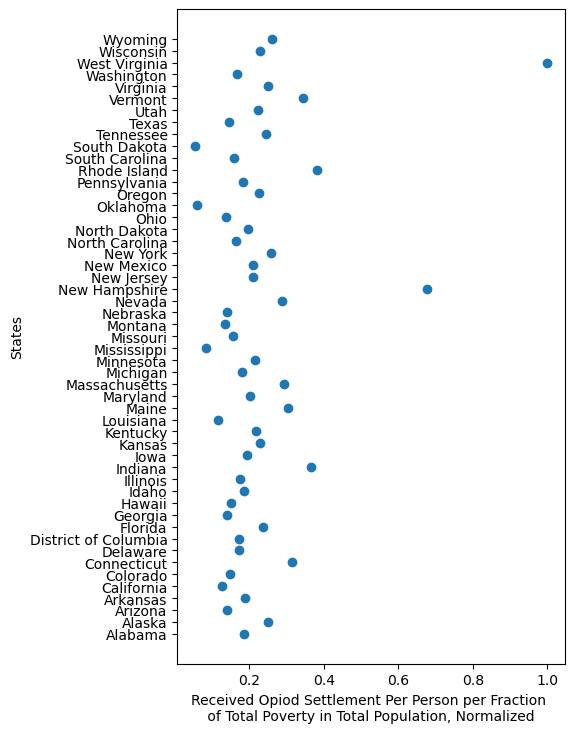

This shows us if certain states have outweighted opioid settlement versus poverty percentage. West Virgina and New Hampshire have a higher ratio than other states


In [10]:
DataPoint=totalInformation['OpioidSettlementReceivedPerPerson']/(totalInformation['TotalPoverty']/totalInformation['TotalPopulation'])
plt.figure(figsize=(5, 8.5)) 
plt.scatter(DataPoint/max(DataPoint),totalInformation['State'])
plt.xlabel("Received Opiod Settlement Per Person per Fraction \n of Total Poverty in Total Population, Normalized ")
plt.ylabel("States")
plt.show()

print("This shows us if certain states have outweighted opioid settlement versus poverty percentage. West Virgina and New Hampshire have a higher ratio than other states")

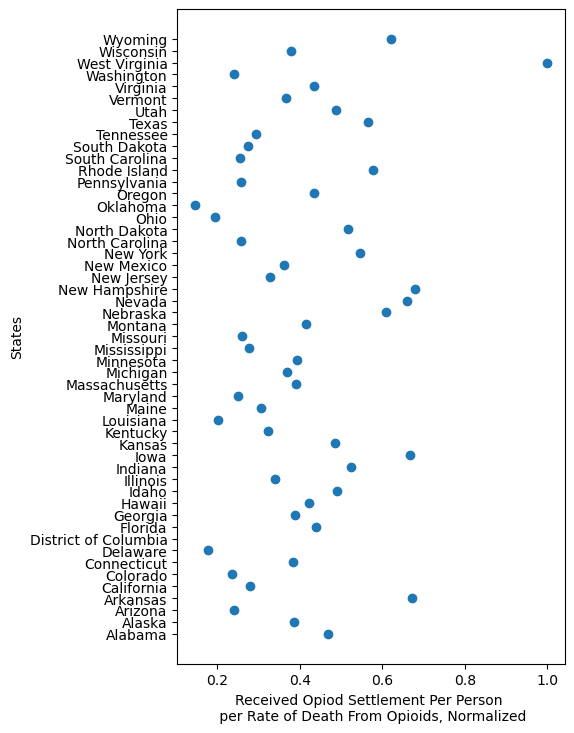

This shows us if certain states have outweighted opioid settlement versus death rate from drugs. West Virgina has a higher rate.


In [11]:
DataPoint = totalInformation['OpioidSettlementReceivedPerPerson']/(totalInformation['Rate'])
plt.figure(figsize=(5, 8.5)) 
plt.scatter(DataPoint/max(DataPoint),totalInformation['State'])
plt.xlabel("Received Opiod Settlement Per Person \n per Rate of Death From Opioids, Normalized")
plt.ylabel("States")
plt.show()

print("This shows us if certain states have outweighted opioid settlement versus death rate from drugs. West Virgina has a higher rate.")

In [12]:
print("Yes West Virgina has been highly effected by the opioid crisis but as the AP reports (https://apnews.com/article/opioid-lawsuit-settlement-west-virginia-1784a2e990a6cdbbd7873edcf760fd64), ' West Virginia has been aggressive in bringing its own lawsuits and reaching more than a dozen settlements', potentially leading to the outweighting of money received shown here.")

Yes West Virgina has been highly effected by the opioid crisis but as the AP reports (https://apnews.com/article/opioid-lawsuit-settlement-west-virginia-1784a2e990a6cdbbd7873edcf760fd64), ' West Virginia has been aggressive in bringing its own lawsuits and reaching more than a dozen settlements', potentially leading to the outweighting of money received shown here.
